In [54]:
import os
import numpy as np
from IPython.display import HTML
import re

# from HMM_from_HW6_solution import *
from HMM_sonnet import *
from HMM_helper_sonnet import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    parse_syllable_dict,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    obs_map_reverser
)

# Part 4: Naive HMM

### Import Data
First we import the data

In [2]:
sonnets_data = open(os.path.join(os.getcwd(), 'Official_Release/data/shakespeare.txt')).read()

In [3]:
obs, obs_map = parse_observations(sonnets_data)

updated!


In [4]:
syllable_data = open(os.path.join(os.getcwd(), 'Official_Release/data/Syllable_dictionary.txt')).read()

In [5]:
syll_map, end_syll_map = parse_syllable_dict(syllable_data)

### Run training

We will train a variety of HMM models with different parameters (number of hidden states, number of training iterations, whether the states are manually specified, etc.).

In [66]:
hmm1 = unsupervised_HMM(obs, 1, 100)

Training iteration 100/100....    

In [7]:
hmm2 = unsupervised_HMM(obs, 2, 100)

Training iteration 100/100....    

In [8]:
hmm4 = unsupervised_HMM(obs, 4, 100)

Training iteration 100/100....    

In [9]:
hmm8 = unsupervised_HMM(obs, 8, 100)

Training iteration 100/100....    

In [10]:
hmm16 = unsupervised_HMM(obs, 16, 100)

Training iteration 100/100....    

In [55]:
hmm32 = unsupervised_HMM(obs, 32, 100)

Training iteration 100/100....    

In [56]:
hmm16_1000 = unsupervised_HMM(obs, 16, 1000)

Training iteration 1000/1000....    

In [60]:
print('\nSample Sentence (16):\n====================')
print(sample_sentence(hmm16, obs_map, n_words=10))
print(sample_sentence(hmm16, obs_map, n_words=25))
print(sample_sentence(hmm16, obs_map, n_words=25))

print('\nSample Sentence (32):\n====================')
print(sample_sentence(hmm32, obs_map, n_words=10))
print(sample_sentence(hmm32, obs_map, n_words=25))
print(sample_sentence(hmm32, obs_map, n_words=25))

print('\nSample Sentence (16 (1000)):\n====================')
print(sample_sentence(hmm16_1000, obs_map, n_words=10))
print(sample_sentence(hmm16_1000, obs_map, n_words=25))
print(sample_sentence(hmm16_1000, obs_map, n_words=25))


Sample Sentence (16):
The on race but as out shall in no have...
Am mine time an one your their true kill bound both love morn so shalt brave of my love is tanned do thy own those...
And wars another love perish to grown a thou and true of junes and it are clean with set sweet if in hide so that...

Sample Sentence (32):
These in heavenly you most love mens old thou seek...
Unthrifty other with face i presentst hath owe tyrant correction are eyes sweet that to modern grew more crowned gain deceived infection beautys wooed foregone...
Alone for muse of moon but love i should glory in wide of loss which yet her a woe will not perfumed confess natures with...

Sample Sentence (16 (1000)):
Unless faith bases the a hath eye to the groan...
Their it to thee thy outright i eves thou nor thy do time reviewest is of victor remembrance my or that beauty we riot love...
Mine all thee this beauty can write every show in excuse this thrusts from me in contains in my great favour and forsworn to th

In [6]:
hmm4manual = unsupervised_HMM(obs, 4, 100, manual_states=True)

Training iteration 1/100....    

/Users/john/OneDrive - California Institute of Technology/Classes/CS 155/CSS_PROJECT3/HMM_sonnet.py:421: RuntimeWarning: divide by zero encountered in true_divide
  marginal_probs[-1][i,:,:] /= marg_norm_constant


Training iteration 100/100....    

### Sample sentences from trained models

Now we print sample sentences from our models just to see how well they perform.

In [11]:
print('\nSample Sentence (4manual):\n====================')
print(sample_sentence(hmm4manual, obs_map, n_words=10))
print(sample_sentence(hmm4manual, obs_map, n_words=10))
print(sample_sentence(hmm4manual, obs_map, n_words=10))


Sample Sentence (4manual):
Wouldst wing promise the whole the might and sleep for...
Against pitch deaths trial thinks wrong sire cunning wastes me...
Angel maiden better is toil praises but of grace unions...


In [12]:
print('\nSample Sentence (2):\n====================')
print(sample_sentence(hmm2, obs_map, n_words=10))
print('\nSample Sentence (4):\n====================')
print(sample_sentence(hmm4, obs_map, n_words=10))
print('\nSample Sentence (8):\n====================')
print(sample_sentence(hmm8, obs_map, n_words=10))
print('\nSample Sentence (16):\n====================')
print(sample_sentence(hmm16, obs_map, n_words=10))


Sample Sentence (2):
Praises your other excusing follow for both your character i...

Sample Sentence (4):
Summers who strikes fair do since desert the hers time...

Sample Sentence (8):
The self my pain wretched my acquaintance own call jealousy...

Sample Sentence (16):
Sweet record against a frownst now lose his pupil besiege...


Surprisingly the two-state model has the best meter. None of the states give coherent sentences.

### Reverse-order training

If we run the training on lines in reverse order, does it work better?

In [15]:
obs_r = []
for line in obs:
    obs_r.append(line[::-1])

In [16]:
hmm4manualr = unsupervised_HMM(obs_r, 4, 100, manual_states=True)

Training iteration 100/100....    

In [33]:
print('\nSample Sentence (4manual_r):\n====================')
print(sample_sentence(hmm4manualr, obs_map, n_words=10, reversed=True))
print(sample_sentence(hmm4manualr, obs_map, n_words=10, reversed=True))
print(sample_sentence(hmm4manualr, obs_map, n_words=10, reversed=True))


Sample Sentence (4manual_r):
Have they seal for glory of his is phrase wet...
Sap to my one want shall then so plain the...
Yet doth worlds is of that the whence i his...


In [18]:
hmm2r = unsupervised_HMM(obs_r, 2, 100)
hmm4r = unsupervised_HMM(obs_r, 4, 100)
hmm8r = unsupervised_HMM(obs_r, 8, 100)
hmm16r = unsupervised_HMM(obs_r, 16, 100)

Training iteration 100/100....    

In [32]:
print('\nSample Sentence (2r):\n====================')
print(sample_sentence(hmm2r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (4r):\n====================')
print(sample_sentence(hmm4r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (8r):\n====================')
print(sample_sentence(hmm8r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (16r):\n====================')
print(sample_sentence(hmm16r, obs_map, n_words=10, reversed=True))


Sample Sentence (2r):
My with their hes love and it dark in for...

Sample Sentence (4r):
Be less muse i i if thy thought art thee...

Sample Sentence (8r):
Of hast my right of i hear more thy kind...

Sample Sentence (16r):
Made loss you face where they parts known thy tomb...


In [20]:
print('\nSample Sentence (2r):\n====================')
print(sample_sentence(hmm2r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (4r):\n====================')
print(sample_sentence(hmm4r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (8r):\n====================')
print(sample_sentence(hmm8r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (16r):\n====================')
print(sample_sentence(hmm16r, obs_map, n_words=10, reversed=True))


Sample Sentence (2r):
Time speak my say not of all that my added...

Sample Sentence (4r):
Some to loves i her praise in that their true...

Sample Sentence (8r):
Which womb feeble lines thee my numbers the i goodly...

Sample Sentence (16r):
To love strikes the strong and so eternity slandering and...


In [21]:
print('\nSample Sentence (2r):\n====================')
print(sample_sentence(hmm2r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (4r):\n====================')
print(sample_sentence(hmm4r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (8r):\n====================')
print(sample_sentence(hmm8r, obs_map, n_words=10, reversed=True))
print('\nSample Sentence (16r):\n====================')
print(sample_sentence(hmm16r, obs_map, n_words=10, reversed=True))


Sample Sentence (2r):
Blot happy by sworn i to to onwards whereto a...

Sample Sentence (4r):
Have thy mine my shalt sweet never then that i...

Sample Sentence (8r):
That i mine be do thy measured the one firm...

Sample Sentence (16r):
Shape think to the or cries to the anon bloody...


# Part 5 - generating sonnets with unsupervised HMM

From our unsupervised HMM we need to generate a 14-line sonnet. The main challenge is to ensure that each line consists of 10 syllables. We will do this by creating an altered sequence emission function that counts syllables as it goes along.

In [22]:
def parse_syllable_dict_wak(text, word_as_key=True):
    '''
    Reads the syllable dictionary and generates
    a Python dictionary where the key is the word
    and the value is the number of syllables for the word.
    If the word has multiple possible syllable values, the
    dictionary entry returns a list with the possible values.
    Syllable counts that can be taken at the end of the line
    only are given as 'En' where n is an integer.
    '''
    lines = [line.split() for line in text.split('\n') if line.split()]
    
    syll_map = {}
    ending_words = []
    for line in lines:
        word = line[0]
        word = re.sub(r'[^\w]','', word).lower()
        
        if len(line) == 2:
            syll_map[word] = line[1]
        elif len(line) == 3:
            syll_map[word] = [line[1],line[2]]
            if ('E' in line[1]) or ('E' in line[2]):
                ending_words.append(word)
            
    return syll_map, ending_words

In [23]:
syll_map_wak, ending_words = parse_syllable_dict_wak(syllable_data)

In [45]:
def generate_line(HMM, obs_map, syll_map_wak,
                  syll_map_cak, end_syll_map_cak, ending_words,
                  reversed_training = False):
    '''
    Generates a sequence consisting of 10 syllabes. Word count may vary.
    Also inputs a word-as-key syllable map and a count-as-key syllable map.
    '''
    obs_map_r = obs_map_reverser(obs_map)
    
    states = []
    words = []
    curr_syllable_count = 0
    
    longest_count = max(syll_map_cak.keys())
    
    O = HMM.O
    A = HMM.A
    
    # Initialize first state randomly
    states.append(np.random.choice(HMM.L))
    # Emit first word
    word0_index = int(np.random.choice(HMM.D, p = O[states[0],:]))
    word0 = obs_map_r[word0_index]
    words.append(word0)
    # Count syllables
    syll_for_word = syll_map_wak[word0]
    if len(syll_for_word) == 2:
        if 'E' in syll_for_word[0]:
            curr_syllable_count += int(syll_for_word[1])
        elif 'E' in syll_for_word[1]:
            curr_syllable_count += int(syll_for_word[0])
        else:
            curr_syllable_count += int(syll_for_word[np.random.randint(0,2)])
    elif len(syll_for_word) == 1:
        curr_syllable_count += int(syll_for_word)
    else:
        print('problem!')
        
    invalid_word_ls = []
    invalid_word_indxs = []
    num_sylls_left = 10 - curr_syllable_count
    counts_invalidated = [num_sylls_left]
    while num_sylls_left > 0:
        # Emit remaining words in sequence
        states.append(int(np.random.choice(HMM.L, p=A[states[-1],:])))
        if num_sylls_left < longest_count:
            for c in np.arange(num_sylls_left+1, min(counts_invalidated)):
                if c in syll_map_cak.keys():
                    words_to_invalidate = syll_map_cak[c]
                    for word in words_to_invalidate:
                        if word in ending_words:
                            ending_count_ls = syll_map_wak[word]
                            if 'E' in ending_count_ls[0]:
                                end_syll_count = int(ending_count_ls[0].replace('E',''))
                            elif 'E' in ending_count_ls[1]:
                                end_syll_count = int(ending_count_ls[1].replace('E',''))
                            else:
                                print('problem!')
                            if end_syll_count <= num_sylls_left:
                                pass # don't invalidate the word
                            else:
                                invalid_word_ls.append(word)
                                invalid_word_indxs.append(obs_map[word])
                        else:
                            invalid_word_ls.append(word)
                            invalid_word_indxs.append(obs_map[word])
                    counts_invalidated.append(c)
            # Mask emission matrix 
            O[:,invalid_word_indxs] = 0
            normsums = []
            for i in range(len(O)):
                normsums.append(sum(O[i,:]))
            for i in range(len(O)):
                for j in range(len(O[0])):
                    O[i,j] /= normsums[i]
        # Emit word from current state
        next_word = obs_map_r[int(np.random.choice(HMM.D, p=O[states[-1],:]))]
        words.append(next_word)
        # count syllables again
        syll_for_word = syll_map_wak[next_word]
        if len(syll_for_word) == 2:
            if 'E' in syll_for_word[0]:
                curr_syllable_count += int(syll_for_word[1])
            elif 'E' in syll_for_word[1]:
                curr_syllable_count += int(syll_for_word[0])
            else:
                curr_syllable_count += int(syll_for_word[np.random.randint(0,2)])
        elif len(syll_for_word) == 1:
            curr_syllable_count += int(syll_for_word)
        else:
            print('problem!')

        num_sylls_left = 10 - curr_syllable_count
        
    if reversed_training:
        states = states[::-1]
        words = words[::-1]
        
    return states, words
    
    

In [25]:
states, words = generate_line(hmm2, obs_map, syll_map_wak, syll_map, end_syll_map, ending_words)

### Generate sample sonnets

Let's generate a sample sonnet now with 14 10-syllable lines, from each model we trained above.

In [26]:
lines_manual = []
lines_manualr = []
for i in range(14):
    _, wm = generate_line(hmm4manual, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    _, wmr = generate_line(hmm4manualr, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=True)
    lines_manual.append(wm)
    lines_manualr.append(wmr)

In [27]:
print('\nSample Sonnet (manual):\n====================')
for i in range(14):
    if i > 11:
        lines_manual[i].insert(0, '    ')
    print(*lines_manual[i])
    
print('\nSample Sonnet (manual_r):\n====================')
for i in range(14):
    if i > 11:
        lines_manualr[i].insert(0, '    ')
    print(*lines_manualr[i])


Sample Sonnet (manual):
thine her his wondring their affords rehearse
deceived thy part it what heavy those
in is and love say praise not black still there
i eyes in never not gone my one my
front have thy will three call it it is when
sweet things pride high my i so of and where
and fair their yet set be i bearing o
spring let find might more their song needs am false
rest the with and on making thee of well
all and and in back story strains keeps whilst
praised doth whose ill fine level pleasure at
her give so fiend on is as new my mine
     why past woe not is own eye with loving
     verse are mine to youth thee a i though praise

Sample Sonnet (manual_r):
i are beauty may one be my doth to
that we fled and blood he my mens so sigh
to seen you praise sad though to i since hold
down the words with with peace his of she my
hand or good hath moon my like or thee of
an no not deeds and art at drained if hell
still did is the when bring be praise broken
treasure own i winds my my strai

In [67]:
lines_1 = []
for i in range(14):
    _, w1= generate_line(hmm1, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    lines_1.append(w1)

In [68]:
print('\nSample Sonnet (1):\n====================')
for i in range(14):
    if i > 11:
        lines_1[i].insert(0, '    ')
    print(*lines_1[i])


Sample Sonnet (1):
could as no truths tonguetied clouds the and lies
wild are which in which and them friends hairs time
with then hounds seem bears and of for he bearst
the which or still who eye down than blanks poor
me reign she like both than it dream this keep
great whats no day of by tongue is thy thou
to book how up i than thy brand cheek tongues
age is for thy stands night thy which he carve
my were of wound in heart thrice verse live would
then thy of graces gives a on i canst
doth will a hath the wish see in shall you
that and that thought thou fair making we shall
     work doth think left the treasure some and hold
     thee line is leave i my and or not and


In [64]:
lines_16_1000 = []
for i in range(14):
    _, w161000 = generate_line(hmm16_1000, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    lines_16_1000.append(w161000)
    
lines_32 = []
for i in range(14):
    _, w32 = generate_line(hmm32, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    lines_32.append(w32)

In [65]:
print('\nSample Sonnet (16 (1000)):\n====================')
for i in range(14):
    if i > 11:
        lines_16_1000[i].insert(0, '    ')
    print(*lines_16_1000[i])

print('\nSample Sonnet (32):\n====================')
for i in range(14):
    if i > 11:
        lines_32[i].insert(0, '    ')
    print(*lines_32[i])


Sample Sonnet (16 (1000)):
came yet with your and which hath will as thee
kind for pain let which from deaths doth to of
self and thy self was fawn why base doth hold
three all from his way from was seem but act
thou my reason write you in my will her
burn day to and thou art makes such lies i
gone doth of breast when things his and is your
all the when loving and wrought due had your
love is of a his can not in give ill
thou and better her is of show be luck
have not part her slide not cold and shine waste
the me though your mind with rich feeding if
     say fast kind be thou in to brave thou of
     yet of me one to huge i what his gainst

Sample Sonnet (32):
live muse mine to loving breast should to the
that i not not fade the of they for my
my breast on edge pen i that thy waves love
you you the which the loved world i but though
a wits to sweet sweet doth take me her in
so thy see is from need of worst thou were
their of i hast this hounds gildst not another
and thou in not to s

In [43]:
lines_2 = []
lines_4 = []
lines_8 = []
lines_16 = []

lines_2r = []
lines_4r = []
lines_8r = []
lines_16r = []
for i in range(14):
    _, w2 = generate_line(hmm2, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    _, w4 = generate_line(hmm4, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    _, w8 = generate_line(hmm8, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    _, w16 = generate_line(hmm16, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=False)
    _, w2r = generate_line(hmm2r, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=True)
    _, w4r = generate_line(hmm4r, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=True)
    _, w8r = generate_line(hmm8r, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=True)
    _, w16r = generate_line(hmm16r, obs_map, syll_map_wak,
                                          syll_map, end_syll_map, ending_words,
                                          reversed_training=True)

    lines_2.append(w2)
    lines_4.append(w4)
    lines_8.append(w8)
    lines_16.append(w16)
    lines_2r.append(w2r)
    lines_4r.append(w4r)
    lines_8r.append(w8r)
    lines_16r.append(w16r)

In [29]:
print('\nSample Sonnet (2):\n====================')
for i in range(14):
    if i > 11:
        lines_2[i].insert(0, '    ')
    print(*lines_2[i])

print('\nSample Sonnet (4):\n====================')
for i in range(14):
    if i > 11:
        lines_4[i].insert(0, '    ')
    print(*lines_4[i])

print('\nSample Sonnet (8):\n====================')
for i in range(14):
    if i > 11:
        lines_8[i].insert(0, '    ')
    print(*lines_8[i])

print('\nSample Sonnet (16):\n====================')
for i in range(14):
    if i > 11:
        lines_16[i].insert(0, '    ')
    print(*lines_16[i])

print('\nSample Sonnet (2r):\n====================')
for i in range(14):
    if i > 11:
        lines_2r[i].insert(0, '    ')
    print(*lines_2r[i])

print('\nSample Sonnet (4r):\n====================')
for i in range(14):
    if i > 11:
        lines_4r[i].insert(0, '    ')
    print(*lines_4r[i])

print('\nSample Sonnet (8r):\n====================')
for i in range(14):
    if i > 11:
        lines_8r[i].insert(0, '    ')
    print(*lines_8r[i])

print('\nSample Sonnet (16r):\n====================')
for i in range(14):
    if i > 11:
        lines_16r[i].insert(0, '    ')
    print(*lines_16r[i])


Sample Sonnet (2):
deep then mine and thy use knife i seem would
all should better i thy my your souls my
the hope laws have a love had am man what
the the and else i main by are deceived
shaken i hath my with in plead robs of
live in not thy were this that death loved all
when thee thee no and is hope lie lords choose
earth that the do blush clouds me do lies in
nights ill in for your out love is dear god
do ye of to may a thee view that wait
dark and weep why from of with the grace love
where power reason jewel hearts stained the far
     and o rest you for must one sin in must
     thou with as in to swearing treasure this

Sample Sonnet (4):
fleece the love happy any both in stay
dumb my all the my bear now any love
it to all see stoln o and seem check an
the flesh take the the my slave those lays a
by fair of arts and not you to to as
in mine to the of most he in we their
to day boast once loves your for but me which
all you can still i doth the the so as
hath your i wink my i to

# Part 6

Incorporate rhyme and meter.

## Rhyme

First we create a rhyming dictionary using all the couplets from Shakespeare's sonnets. We can just iterate through the lines in the observation map we already have and pick the last word of each line.

In [131]:
def get_rhyming_dict(obs, obs_map_r):
    '''
    Returns a dictionary where every key is a end-line word
    from the sonnets and its value is its rhyme pair.
    '''
    rhyme_dict = dict()
    line_counter = 0
    sonnet_counter = 1
    a_pair = []
    b_pair = []
    for line in obs:
        if (sonnet_counter != 99) & (sonnet_counter != 126):
            last_word = obs_map_r[line[-1]]
            if (line_counter % 4 == 0) & (line_counter < 12):
                a_pair.append(last_word)
            elif (line_counter % 4 == 1) & (line_counter < 12):
                b_pair.append(last_word)
            elif (line_counter % 4 == 2) & (line_counter < 12):
                a_pair.append(last_word)
                assert len(a_pair) == 2
                rhyme_dict[a_pair[0]] = a_pair[1]
                rhyme_dict[a_pair[1]] = a_pair[0]
                a_pair = []
            elif (line_counter % 4 == 3) & (line_counter < 12):
                b_pair.append(last_word)
                assert len(b_pair) == 2
                rhyme_dict[b_pair[0]] = b_pair[1]
                rhyme_dict[b_pair[1]] = b_pair[0]
                b_pair = []
            elif line_counter == 12:
                a_pair.append(last_word)
            elif line_counter == 13:
                a_pair.append(last_word)
                assert len(a_pair) == 2
                rhyme_dict[a_pair[0]] = a_pair[1]
                rhyme_dict[a_pair[1]] = a_pair[0]
                a_pair = []
                line_counter = -1
                sonnet_counter += 1
            line_counter += 1
        elif sonnet_counter == 99:
            if line_counter == 14:
                sonnet_counter += 1
                line_counter = -1
            line_counter += 1
        elif sonnet_counter == 126:
            if line_counter == 11:
                sonnet_counter += 1
                line_counter = -1
            line_counter += 1
            
    return rhyme_dict

In [132]:
obs_map_r = obs_map_reverser(obs_map)

In [133]:
rhyme_dict = get_rhyming_dict(obs, obs_map_r)

## Meter

Now let's use a syllable stress dictionary.. we could import from NLTK, or we could also extract them from Shakespeare in the same way, assuming he follows the iambic pentameter strictly. Let's try the latter and see what happens.

In [175]:
def get_stress_dict(obs, obs_map_r, syll_dict_wak, reverse_y=True):
    '''
    Returns two dictionaries classifying all the words in the sonnets
    into four stress categories: [{U,S}, {U,S}], where U = unstressed
    and S = stressed, depending on whether the word begins and ends
    with U or S syllable.

    Stress is calculated by assuming all lines follow iambic pentameter
    and using the number of syllables of the word to determine the
    stress of its first and last syllable, as it fits with iambic pentameter.
    
    The dictionaries returned are word_as_key (wak), with key words and 
    value the stress categories it can fall in (if multiple, a list), and
    state_as_key (sak), with the four states as keys and a list of all words
    that fit in these states as the value.
    '''
	stress_dict_states = dict()
	ss_ls = []
	su_ls = []
	us_ls = []
	uu_ls = []
	stress_dict_words = dict()

	# key: UU = 0, US = 1, SU = 2, SS = 3
	obs_y = []

	for line in obs:
		line_y = []
		num_words_in_line = len(line)
		for i in range(num_words_in_line):
			word = obs_map_r[line[i]]
			# how many syllables?
			syll_ls = syll_dict_wak[word]
			if len(syll_ls) == 2:
				if 'E' in syll_ls[0]:
					if i == num_words_in_line-1: # last word
						num_sylls = int(syll_ls[0].replace('E',''))
					else:
						num_sylls = int(syll_ls[1])
				elif 'E' in syll_ls[1]:
					if i == num_words_in_line-1:
						num_sylls = int(syll_ls[1].replace('E',''))
					else:
						num_sylls = int(syll_ls[0])
				else:
					num_sylls = int(syll_ls[np.random.randint(0,2)])
			else:
				num_sylls = int(syll_ls)
			# Categorize stresses
			if i == 0: # first word
				# then first syllable is unstressed
				if num_sylls % 2 == 0: # even number of syllables
					# then US
					us_ls.append(word)
					if word in stress_dict_words.keys():
						if 'US' not in stress_dict_words[word]:
							stress_dict_words[word].append('US')
					else:
						stress_dict_words[word] = ['US']
					next_stress = 'U'
					line_y.append(1)
				else: # odd number of syllables
					# then UU
					uu_ls.append(word)
					if word in stress_dict_words.keys():
						if 'UU' not in stress_dict_words[word]:
							stress_dict_words[word].append('UU')
					else:
						stress_dict_words[word] = ['UU']
					next_stress = 'S'
					line_y.append(0)
			else: # all other words
				if next_stress == 'U':
					if num_sylls % 2 == 0: # even number of syllables
						# then US
						us_ls.append(word)
						if word in stress_dict_words.keys():
							if 'US' not in stress_dict_words[word]:
								stress_dict_words[word].append('US')
						else:
							stress_dict_words[word] = ['US']
						next_stress = 'U'
						line_y.append(1)
					else: # odd number of syllables
						# then UU
						uu_ls.append(word)
						if word in stress_dict_words.keys():
							if 'UU' not in stress_dict_words[word]:
								stress_dict_words[word].append('UU')
						else:
							stress_dict_words[word] = ['UU']
						next_stress = 'S'
						line_y.append(0)
				else:
					if num_sylls % 2 == 0:
						# then SU
						su_ls.append(word)
						if word in stress_dict_words.keys():
							if 'SU' not in stress_dict_words[word]:
								stress_dict_words[word].append('SU')
						else:
							stress_dict_words[word] = ['SU']
						next_stress = 'S'
						line_y.append(2)
					else:
						# then SS
						ss_ls.append(word)
						if word in stress_dict_words.keys():
							if 'SS' not in stress_dict_words[word]:
								stress_dict_words[word].append('SS')
						else:
							stress_dict_words[word] = ['SS']
						next_stress = 'U'
						line_y.append(3)
		if reverse_y:
			obs_y.append(line_y[::-1])
		else:
			obs_y.append(line_y)

	stress_dict_states['SS'] = ss_ls
	stress_dict_states['SU'] = su_ls
	stress_dict_states['US'] = us_ls
	stress_dict_states['UU'] = uu_ls

	return (stress_dict_words, stress_dict_states, obs_y)

In [178]:
stress_dict_words, stress_dict_states, obs_y_r = get_stress_dict(obs, obs_map_r, syll_map_wak)

### Now let's train an HMM using these states

Strategy: We want to initialize $A$ to transition only between states that maintain iambic pentameter. We also want to label the data with states.

In [261]:
def supervised_learning_sonnet(HMM, X, Y):
    '''
    Trains the HMM using the Maximum Likelihood closed form solutions
    for the transition and observation matrices on a labeled
    datset (X, Y). Note that this method does not return anything, but
    instead updates the attributes of the HMM object.

    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers 
                    ranging from 0 to D - 1. In other words, a list of
                    lists.

        Y:          A dataset consisting of state sequences in the form
                    of lists of variable length, consisting of integers 
                    ranging from 0 to L - 1. In other words, a list of
                    lists.

                    Note that the elements in X line up with those in Y.
    '''

    # Calculate each element of A using the M-step formulas.
    for curr in range(HMM.L):
        for nxt in range(HMM.L):
            num = 0.
            den = 0.

            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                M = len(x)

                num += len([1 for i in range(M - 1) \
                            if y[i] == curr and y[i + 1] == nxt])
                den += len([1 for i in range(M - 1) if y[i] == curr])

            HMM.A[curr][nxt] = num / den

    # Calculate each element of O using the M-step formulas.
    for curr in range(HMM.L):
        for xt in range(HMM.D):
            num = 0.
            den = 0.

            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                M = len(x)

                num += len([1 for i in range(M) \
                            if y[i] == curr and x[i] == xt])
                den += len([1 for i in range(M) if y[i] == curr])

            HMM.O[curr][xt] = num / den

    return HMM

In [262]:
def supervised_HMM_sonnet(X, Y):
    '''
    Helper function to train a supervised HMM. The function determines the
    number of unique states and observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for supervised learning.

    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers 
                    ranging from 0 to D - 1. In other words, a list of lists.

        Y:          A dataset consisting of state sequences in the form
                    of lists of variable length, consisting of integers 
                    ranging from 0 to L - 1. In other words, a list of lists.
                    Note that the elements in X line up with those in Y.
    '''

    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Make a set of states.
    states = set()
    for y in Y:
        states |= set(y)
    
    # Compute L and D.
    L = len(states)
    D = len(observations)

    # Randomly initialize and normalize matrices A and O.
    A = [[random.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm
    
    O = [[random.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # Train an HMM with labeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM = supervised_learning_sonnet(HMM, X, Y)

    return HMM

In [263]:
hmm_supervised_s = supervised_HMM_sonnet(obs_r, obs_y_r)

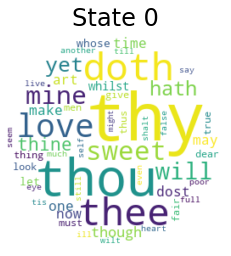

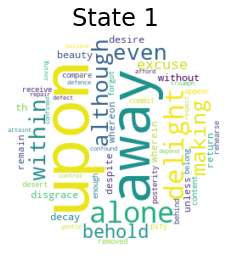

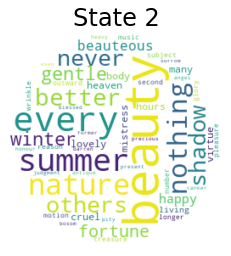

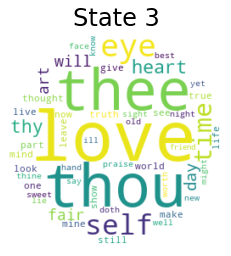

In [264]:
states_to_wordclouds(hmm_supervised_s, obs_map)

## Put it all together

Strategy:

Use a reverse-trained model. Seed the last word of a line first and ensure rhyming couplet. Generate rest of line with appropriate meter requirements, using masking to eliminate other choices.

In [268]:
def generate_sonnet(HMM, obs_map, obs_map_r, syll_map_wak,
					syll_map_cak, rhyme_dict):
	'''
	Assumes reversed-training is True!

	Instead of masking, re-picks until OK
	'''
	couplets_states = []
	couplets_words = []

	for i in range(7):

		states0 = []
		words0 = []
		states1 = []
		words1 = []
		curr_syllable_count0 = 0
		curr_syllable_count1 = 0

		longest_count = max(syll_map_cak.keys())

		O = HMM.O
		A = HMM.A

		# Initialize first state randomly
		valid_word_selected = False
		while valid_word_selected == False:
			state0 = np.random.choice(HMM.L)
			word0_index = int(np.random.choice(HMM.D, p = O[state0,:]))
			word0 = obs_map_r[word0_index]
			# Check if a rhyme pair exists
			if word0 in rhyme_dict.keys():
				valid_word_selected = True
		# Initialize the paired couplet wiht the rhyme
		word1 = rhyme_dict[word0]
		# Pick the state that generated that word, probabilistically
		word1_state_probs = O[:,obs_map[word1]]/sum(O[:,obs_map[word1]])
		state1 = int(np.random.choice(HMM.L, p=word1_state_probs))

		states0.append(state0)
		words0.append(word0)
		states1.append(state1)
		words1.append(word1)

		# Count syllables (remember this is the end of the line)
		syll_for_word = syll_map_wak[word0]
		if len(syll_for_word) == 2:
			if 'E' in syll_for_word[0]:
				curr_syllable_count0 += int(syll_for_word[0].replace('E',''))
			elif 'E' in syll_for_word[1]:
				curr_syllable_count0 += int(syll_for_word[1].replace('E',''))
			else:
				curr_syllable_count0 += int(syll_for_word[np.random.randint(0,2)])
		else:
			curr_syllable_count0 += int(syll_for_word)

		syll_for_word = syll_map_wak[word1]
		if len(syll_for_word) == 2:
			if 'E' in syll_for_word[0]:
				curr_syllable_count1 += int(syll_for_word[0].replace('E',''))
			elif 'E' in syll_for_word[1]:
				curr_syllable_count1 += int(syll_for_word[1].replace('E',''))
			else:
				curr_syllable_count1 += int(syll_for_word[np.random.randint(0,2)])
		else:
			curr_syllable_count1 += int(syll_for_word)

		# Fill in rest of sequence 0
		num_sylls_left0 = 10 - curr_syllable_count0
		while num_sylls_left0 > 0:
			# Emit remaining words in sequence
			states0.append(int(np.random.choice(HMM.L, p=A[states[-1],:])))
			# Emit a word from the current state
			next_word_valid = False
			while next_word_valid == False:
				next_word0 = obs_map_r[int(np.random.choice(HMM.D, p=O[states0[-1],:]))]
				# Count syllables again
				syll_for_word = syll_map_wak[next_word0]
				if len(syll_for_word) == 2: # remember word is not at end now
					if 'E' in syll_for_word[0]:
						next_word_sylls = int(syll_for_word[1])
					elif 'E' in syll_for_word[1]:
						next_word_sylls = int(syll_for_word[0])
					else:
						next_word_sylls = int(syll_for_word[np.random.randint(0,2)])
				elif len(syll_for_word) == 1:
					next_word_sylls = int(syll_for_word)
				if next_word_sylls <= num_sylls_left0:
					next_word_valid = True

			words0.append(next_word0)
			curr_syllable_count0 += next_word_sylls
			num_sylls_left0 = 10 - curr_syllable_count0

		num_sylls_left1 = 10 - curr_syllable_count1
		while num_sylls_left1 > 0:
			# Emit remaining words in sequence
			states1.append(int(np.random.choice(HMM.L, p=A[states[-1],:])))
			# Emit a word from the current state
			next_word_valid = False
			while next_word_valid == False:
				next_word1 = obs_map_r[int(np.random.choice(HMM.D, p=O[states1[-1],:]))]
				# Count syllables again
				syll_for_word = syll_map_wak[next_word1]
				if len(syll_for_word) == 2: # remember word is not at end now
					if 'E' in syll_for_word[0]:
						next_word_sylls = int(syll_for_word[1])
					elif 'E' in syll_for_word[1]:
						next_word_sylls = int(syll_for_word[0])
					else:
						next_word_sylls = int(syll_for_word[np.random.randint(0,2)])
				elif len(syll_for_word) == 1:
					next_word_sylls = int(syll_for_word)
				if next_word_sylls <= num_sylls_left1:
					next_word_valid = True

			words1.append(next_word1)
			curr_syllable_count1 += next_word_sylls
			num_sylls_left1 = 10 - curr_syllable_count1

		states0 = states0[::-1]
		states1 = states1[::-1]
		words0 = words0[::-1]
		words1 = words1[::-1]

		couplets_states.append([states0, states1])
		couplets_words.append([words0, words1])

	return (couplets_states, couplets_words)


In [271]:
couplets_states, couplets_words = generate_sonnet(hmm_supervised_s, obs_map, obs_map_r, syll_map_wak, syll_map, rhyme_dict)

In [272]:
print(*couplets_words[0][0])
print(*couplets_words[1][0])
print(*couplets_words[0][1])
print(*couplets_words[1][1])
print(*couplets_words[2][0])
print(*couplets_words[3][0])
print(*couplets_words[2][1])
print(*couplets_words[3][1])
print(*couplets_words[4][0])
print(*couplets_words[5][0])
print(*couplets_words[4][1])
print(*couplets_words[5][1])
print(' ',*couplets_words[6][0])
print(' ',*couplets_words[6][1])

weeds sin think the assured live love straight
me strong forsworn tell a fell and defy
her own how best still but wherethrough oft bait
day gain well than in thou bonds ear to lie
winds high my with earth divide stones allayed
looks ink reason thou their black first bring art
to all he dwellers still appetite said
chide unkind you against eyes wealth should heart
could muse thus hue songs allege speaking life
words th sweets lays bold i seem eyes your vexed i
esteeming night is alchemy ill knife
hits own days wit frown desire in given be
  she glass eye wrong with in tear hell part never
  sight i thou bring age love having the fever


# Part 8 - Visualizing the HMM


Animating...


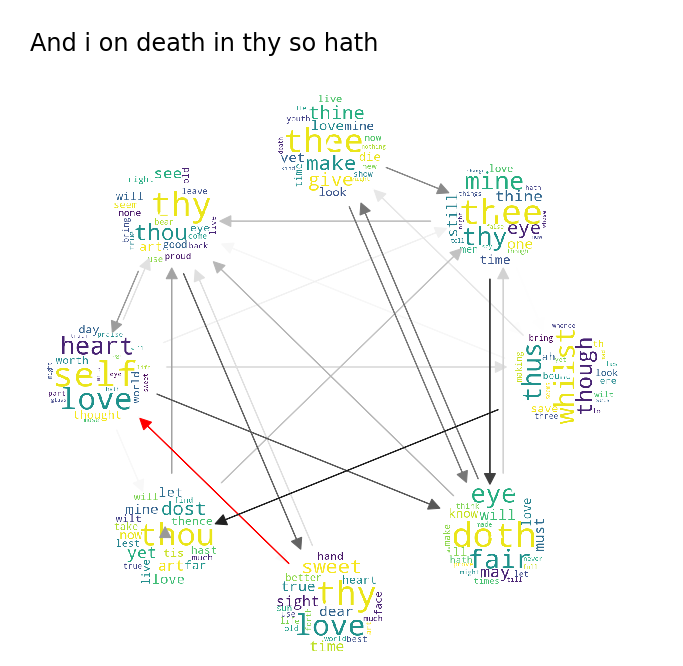

In [304]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())

In [318]:
def print_top_words_from_each_state(HMM, cutoff_num, obs_map_r):
    top_words_per_state = []
    for l in range(HMM.L):
        slice_of_O = np.array(HMM.O[l][:])
        assert len(slice_of_O) == HMM.D
        sorted_slice = np.sort(slice_of_O)
        top_vals = sorted_slice[-cutoff_num:]
        top_words = []
        for val in top_vals:
            top_words.insert(0, obs_map_r[np.where(slice_of_O == val)[0][0]])
        top_words_per_state.append(top_words)
    return top_words_per_state

In [319]:
top10 = print_top_words_from_each_state(hmm8, 10, obs_map_r)

In [320]:
for l in range(len(top10)):
    print('state', l, ': ',top10[l])

state 0 :  ['and', 'but', 'o', 'when', 'which', 'so', 'that', 'then', 'or', 'who']
state 1 :  ['i', 'thee', 'a', 'his', 'be', 'thy', 'is', 'me', 'mine', 'their']
state 2 :  ['thee', 'that', 'me', 'you', 'i', 'to', 'this', 'with', 'all', 'yet']
state 3 :  ['the', 'my', 'thy', 'of', 'your', 'it', 'no', 'not', 'thou', 'this']
state 4 :  ['of', 'self', 'is', 'love', 'heart', 'not', 'world', 'praise', 'worth', 'that']
state 5 :  ['thou', 'in', 'that', 'for', 'i', 'if', 'when', 'all', 'by', 'but']
state 6 :  ['thy', 'so', 'love', 'be', 'sweet', 'or', 'loves', 'hand', 'dear', 'nor']
state 7 :  ['to', 'and', 'in', 'with', 'of', 'a', 'that', 'doth', 'on', 'for']


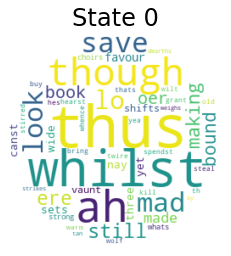

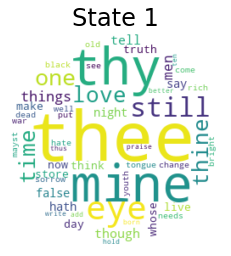

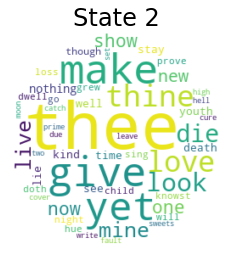

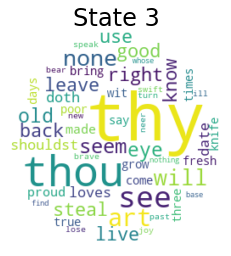

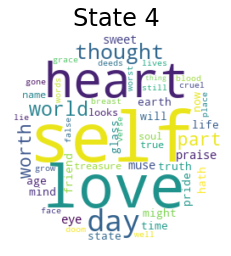

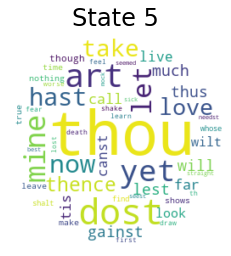

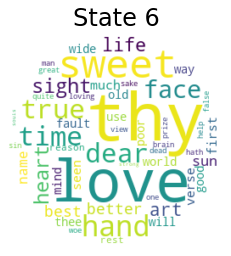

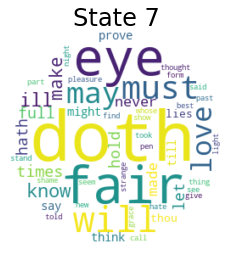

In [305]:
wordclouds = states_to_wordclouds(hmm8, obs_map)